In [2]:
# Import needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Import Break and Enter dataset
Robbery = pd.read_csv('./Basic_Methods-(Data)/Group Project/Break_and_Enter_2014_to_2019.csv',encoding = 'unicode_escape')

In [4]:
Robbery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43302 entries, 0 to 43301
Data columns (total 29 columns):
X                      43302 non-null float64
Y                      43302 non-null float64
Index_                 43302 non-null int64
event_unique_id        43302 non-null object
occurrencedate         43302 non-null object
reporteddate           43302 non-null object
premisetype            43302 non-null object
ucr_code               43302 non-null int64
ucr_ext                43302 non-null int64
offence                43302 non-null object
reportedyear           43302 non-null int64
reportedmonth          43302 non-null object
reportedday            43302 non-null int64
reporteddayofyear      43302 non-null int64
reporteddayofweek      43302 non-null object
reportedhour           43302 non-null int64
occurrenceyear         43301 non-null float64
occurrencemonth        43301 non-null object
occurrenceday          43301 non-null float64
occurrencedayofyear    43301 non-null f

In [5]:
Robbery.describe()

,X,Y,Index_,ucr_code,ucr_ext,reportedyear,reportedday,reporteddayofyear,reportedhour,occurrenceyear,occurrenceday,occurrencedayofyear,occurrencehour,Hood_ID,Lat,Long,ObjectId
count,4.330200e+04,4.330200e+04,43302.000000,43302.000000,43302.000000,43302.000000,43302.000000,43302.000000,43302.000000,43301.000000,43301.000000,43301.000000,43302.000000,43302.000000,43302.000000,43302.000000,43302.000000
mean,-8.837574e+06,5.420199e+06,98308.070274,2120.001132,202.948132,2016.598032,15.781534,187.371553,12.518175,2016.585067,15.695250,187.801229,10.996097,73.977438,43.706895,-79.389278,21651.500000
std,1.066907e+04,8.236009e+03,58980.101633,0.069465,6.919186,1.750686,8.612507,105.187760,6.133789,1.758883,8.645634,105.106452,6.966893,38.722861,0.053475,0.095842,12500.355015
min,-8.864928e+06,5.401765e+06,2.000000,2120.000000,200.000000,2014.000000,1.000000,1.000000,0.000000,2002.000000,1.000000,1.000000,0.000000,1.000000,43.587093,-79.635000,1.000000
25%,-8.843888e+06,5.413291e+06,44710.250000,2120.000000,200.000000,2015.000000,8.000000,98.000000,8.000000,2015.000000,8.000000,98.000000,5.000000,41.000000,43.662045,-79.446000,10826.250000
50%,-8.837877e+06,5.418729e+06,98412.500000,2120.000000,200.000000,2017.000000,16.000000,191.000000,13.000000,2017.000000,16.000000,191.000000,11.000000,76.000000,43.697376,-79.392000,21651.500000
75%,-8.829973e+06,5.427003e+06,152150.750000,2120.000000,200.000000,2018.000000,23.000000,280.000000,17.000000,2018.000000,23.000000,280.000000,17.000000,105.000000,43.751087,-79.321000,32476.750000
max,-8.808043e+06,5.440879e+06,196520.000000,2125.000000,230.000000,2019.000000,31.000000,366.000000,23.000000,2019.000000,31.000000,366.000000,23.000000,140.000000,43.841065,-79.124000,43302.000000


In [6]:
# More than 10,000 occurrences of B&E
Robbery['offence'].value_counts()

B&E                             36305
B&E W'Intent                     5630
Unlawfully In Dwelling-House     1272
B&E Out                            78
B&E - To Steal Firearm              9
B&E - M/Veh To Steal Firearm        8
Name: offence, dtype: int64

Text(0.5, 1.0, 'B&E Distribution')

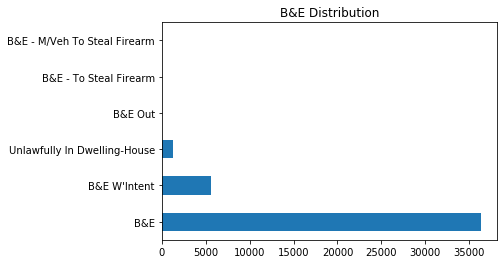

In [7]:
Robbery['offence'].value_counts().plot(kind = 'barh')
plt.title('B&E Distribution')

In [8]:
# Cut out categories other than B&E
is_BE = Robbery['offence'] == 'B&E'

In [9]:
# Cut out categories other than B&E
Robbery_BE = Robbery[is_BE]

In [10]:
# Make sure B&E is all that remains
Robbery_BE['offence'].value_counts()

B&E    36305
Name: offence, dtype: int64

In [11]:
# More than 10,000 occurrences of House and Commercial
Robbery_BE['premisetype'].value_counts()

House         12873
Commercial    11622
Apartment      9576
Other          2221
Outside          13
Name: premisetype, dtype: int64

Text(0.5, 1.0, 'Premise Distribution')

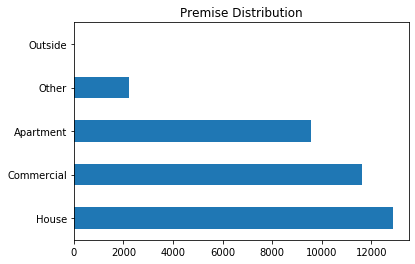

In [12]:
Robbery_BE['premisetype'].value_counts().plot(kind = 'barh')
plt.title('Premise Distribution')

In [13]:
Robbery_BE['premisetype'].value_counts()

House         12873
Commercial    11622
Apartment      9576
Other          2221
Outside          13
Name: premisetype, dtype: int64

In [14]:
# Use House since this category has to do with our objective
is_House = Robbery_BE['premisetype'] == 'House'

In [15]:
# Use House since this category has to do with our objective
Robbery_P = Robbery_BE[is_House]

In [16]:
# Check to make sure House is all that remains
Robbery_P['premisetype'].value_counts()

House    12873
Name: premisetype, dtype: int64

In [17]:
Robbery_P.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12873 entries, 16 to 43284
Data columns (total 29 columns):
X                      12873 non-null float64
Y                      12873 non-null float64
Index_                 12873 non-null int64
event_unique_id        12873 non-null object
occurrencedate         12873 non-null object
reporteddate           12873 non-null object
premisetype            12873 non-null object
ucr_code               12873 non-null int64
ucr_ext                12873 non-null int64
offence                12873 non-null object
reportedyear           12873 non-null int64
reportedmonth          12873 non-null object
reportedday            12873 non-null int64
reporteddayofyear      12873 non-null int64
reporteddayofweek      12873 non-null object
reportedhour           12873 non-null int64
occurrenceyear         12873 non-null float64
occurrencemonth        12873 non-null object
occurrenceday          12873 non-null float64
occurrencedayofyear    12873 non-null 

In [18]:
df = Robbery_P.copy()

In [19]:
# Drop unecessary columns
df.drop(['X','Y','Index_','event_unique_id','reporteddate','ucr_code','ucr_ext'], axis = 1, inplace = True)
df.head(5)

,occurrencedate,premisetype,offence,reportedyear,reportedmonth,reportedday,reporteddayofyear,reporteddayofweek,reportedhour,occurrenceyear,...,occurrencedayofyear,occurrencedayofweek,occurrencehour,MCI,Division,Hood_ID,Neighbourhood,Lat,Long,ObjectId
16,2014/01/06 05:00:00+00,House,B&E,2014,January,7,7,Tuesday,21,2014.0,...,6.0,Monday,22,Break and Enter,D22,9,Edenbridge-Humber Valley (9),43.679287,-79.525,17
21,2014/01/14 05:00:00+00,House,B&E,2014,January,14,14,Tuesday,16,2014.0,...,14.0,Tuesday,16,Break and Enter,D41,119,Wexford/Maryvale (119),43.746746,-79.303,22
23,2014/01/31 05:00:00+00,House,B&E,2014,January,31,31,Friday,18,2014.0,...,31.0,Friday,7,Break and Enter,D31,27,York University Heights (27),43.754845,-79.506,24
25,2014/01/30 05:00:00+00,House,B&E,2014,January,30,30,Thursday,19,2014.0,...,30.0,Thursday,19,Break and Enter,D33,45,Parkwoods-Donalda (45),43.742348,-79.323,26
31,2014/02/15 05:00:00+00,House,B&E,2014,February,15,46,Saturday,21,2014.0,...,46.0,Saturday,21,Break and Enter,D53,103,Lawrence Park South (103),43.718899,-79.404,32


In [20]:
# Drop unecessary columns
df.drop(['reportedyear','reportedmonth','reportedday','reporteddayofweek','reportedhour','MCI','Division'], axis = 1, inplace = True)
df.head(5)

,occurrencedate,premisetype,offence,reporteddayofyear,occurrenceyear,occurrencemonth,occurrenceday,occurrencedayofyear,occurrencedayofweek,occurrencehour,Hood_ID,Neighbourhood,Lat,Long,ObjectId
16,2014/01/06 05:00:00+00,House,B&E,7,2014.0,January,6.0,6.0,Monday,22,9,Edenbridge-Humber Valley (9),43.679287,-79.525,17
21,2014/01/14 05:00:00+00,House,B&E,14,2014.0,January,14.0,14.0,Tuesday,16,119,Wexford/Maryvale (119),43.746746,-79.303,22
23,2014/01/31 05:00:00+00,House,B&E,31,2014.0,January,31.0,31.0,Friday,7,27,York University Heights (27),43.754845,-79.506,24
25,2014/01/30 05:00:00+00,House,B&E,30,2014.0,January,30.0,30.0,Thursday,19,45,Parkwoods-Donalda (45),43.742348,-79.323,26
31,2014/02/15 05:00:00+00,House,B&E,46,2014.0,February,15.0,46.0,Saturday,21,103,Lawrence Park South (103),43.718899,-79.404,32


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12873 entries, 16 to 43284
Data columns (total 15 columns):
occurrencedate         12873 non-null object
premisetype            12873 non-null object
offence                12873 non-null object
reporteddayofyear      12873 non-null int64
occurrenceyear         12873 non-null float64
occurrencemonth        12873 non-null object
occurrenceday          12873 non-null float64
occurrencedayofyear    12873 non-null float64
occurrencedayofweek    12873 non-null object
occurrencehour         12873 non-null int64
Hood_ID                12873 non-null int64
Neighbourhood          12873 non-null object
Lat                    12873 non-null float64
Long                   12873 non-null float64
ObjectId               12873 non-null int64
dtypes: float64(5), int64(4), object(6)
memory usage: 1.6+ MB


In [22]:
df['Hood_ID'].value_counts(bins=5)

(28.8, 56.6]      3508
(112.2, 140.0]    3484
(84.4, 112.2]     2072
(0.86, 28.8]      2067
(56.6, 84.4]      1742
Name: Hood_ID, dtype: int64

In [23]:
# Drop unecessary columns
df.drop(['Neighbourhood','Lat','Long','ObjectId','reporteddayofyear'], axis = 1, inplace = True)
df.head(5)

,occurrencedate,premisetype,offence,occurrenceyear,occurrencemonth,occurrenceday,occurrencedayofyear,occurrencedayofweek,occurrencehour,Hood_ID
16,2014/01/06 05:00:00+00,House,B&E,2014.0,January,6.0,6.0,Monday,22,9
21,2014/01/14 05:00:00+00,House,B&E,2014.0,January,14.0,14.0,Tuesday,16,119
23,2014/01/31 05:00:00+00,House,B&E,2014.0,January,31.0,31.0,Friday,7,27
25,2014/01/30 05:00:00+00,House,B&E,2014.0,January,30.0,30.0,Thursday,19,45
31,2014/02/15 05:00:00+00,House,B&E,2014.0,February,15.0,46.0,Saturday,21,103


In [24]:
df['occurrencedayofweek'].value_counts()

Friday        2342
Thursday      2077
Wednesday     1971
Tuesday       1906
Monday        1755
Saturday      1687
Sunday        1135
Name: occurrencedayofweek, dtype: int64

In [25]:
# Can't replace so will use dummy variables
df['occurrencedayofweek'].replace('Wednesday', 3, inplace=True)

In [26]:
df.head(5)

,occurrencedate,premisetype,offence,occurrenceyear,occurrencemonth,occurrenceday,occurrencedayofyear,occurrencedayofweek,occurrencehour,Hood_ID
16,2014/01/06 05:00:00+00,House,B&E,2014.0,January,6.0,6.0,Monday,22,9
21,2014/01/14 05:00:00+00,House,B&E,2014.0,January,14.0,14.0,Tuesday,16,119
23,2014/01/31 05:00:00+00,House,B&E,2014.0,January,31.0,31.0,Friday,7,27
25,2014/01/30 05:00:00+00,House,B&E,2014.0,January,30.0,30.0,Thursday,19,45
31,2014/02/15 05:00:00+00,House,B&E,2014.0,February,15.0,46.0,Saturday,21,103


In [27]:
# Drop unecessary columns
df.loc[df['occurrencedayofweek'] == 'Wednesday', 'occurrencedayofweek'].replace('Wednesday', 3, inplace=True)
df.head(5)

,occurrencedate,premisetype,offence,occurrenceyear,occurrencemonth,occurrenceday,occurrencedayofyear,occurrencedayofweek,occurrencehour,Hood_ID
16,2014/01/06 05:00:00+00,House,B&E,2014.0,January,6.0,6.0,Monday,22,9
21,2014/01/14 05:00:00+00,House,B&E,2014.0,January,14.0,14.0,Tuesday,16,119
23,2014/01/31 05:00:00+00,House,B&E,2014.0,January,31.0,31.0,Friday,7,27
25,2014/01/30 05:00:00+00,House,B&E,2014.0,January,30.0,30.0,Thursday,19,45
31,2014/02/15 05:00:00+00,House,B&E,2014.0,February,15.0,46.0,Saturday,21,103


In [28]:
# Didn't Work
conditions = [
    (df['occurrencedayofweek'] == 'Monday'),
    (df['occurrencedayofweek'] == 'Tuesday'),
    (df['occurrencedayofweek'] == 'Wednesday'),
    (df['occurrencedayofweek'] == 'Thursday'),
    (df['occurrencedayofweek'] == 'Friday'),
    (df['occurrencedayofweek'] == 'Saturday'),
    (df['occurrencedayofweek'] == 'Sunday'),
    ]






In [29]:
# Didn't Work
values = [1,2,3,4,5,6,7]

In [30]:
# Didn't Work
df['week_day'] = np.select(conditions, values)

In [31]:
df.head(5)

,occurrencedate,premisetype,offence,occurrenceyear,occurrencemonth,occurrenceday,occurrencedayofyear,occurrencedayofweek,occurrencehour,Hood_ID,week_day
16,2014/01/06 05:00:00+00,House,B&E,2014.0,January,6.0,6.0,Monday,22,9,0
21,2014/01/14 05:00:00+00,House,B&E,2014.0,January,14.0,14.0,Tuesday,16,119,0
23,2014/01/31 05:00:00+00,House,B&E,2014.0,January,31.0,31.0,Friday,7,27,0
25,2014/01/30 05:00:00+00,House,B&E,2014.0,January,30.0,30.0,Thursday,19,45,0
31,2014/02/15 05:00:00+00,House,B&E,2014.0,February,15.0,46.0,Saturday,21,103,0


In [32]:
# Change months to numerical data
df['occurrencemonth'].replace({"July": 7}, inplace=True)
df.head(5)

,occurrencedate,premisetype,offence,occurrenceyear,occurrencemonth,occurrenceday,occurrencedayofyear,occurrencedayofweek,occurrencehour,Hood_ID,week_day
16,2014/01/06 05:00:00+00,House,B&E,2014.0,January,6.0,6.0,Monday,22,9,0
21,2014/01/14 05:00:00+00,House,B&E,2014.0,January,14.0,14.0,Tuesday,16,119,0
23,2014/01/31 05:00:00+00,House,B&E,2014.0,January,31.0,31.0,Friday,7,27,0
25,2014/01/30 05:00:00+00,House,B&E,2014.0,January,30.0,30.0,Thursday,19,45,0
31,2014/02/15 05:00:00+00,House,B&E,2014.0,February,15.0,46.0,Saturday,21,103,0


In [33]:
# Change months to numerical data
df['occurrencemonth'].replace({'January': 1,'February':2,'March':3,'April':4,'May':5 }, inplace=True)
df.head(5)

,occurrencedate,premisetype,offence,occurrenceyear,occurrencemonth,occurrenceday,occurrencedayofyear,occurrencedayofweek,occurrencehour,Hood_ID,week_day
16,2014/01/06 05:00:00+00,House,B&E,2014.0,1,6.0,6.0,Monday,22,9,0
21,2014/01/14 05:00:00+00,House,B&E,2014.0,1,14.0,14.0,Tuesday,16,119,0
23,2014/01/31 05:00:00+00,House,B&E,2014.0,1,31.0,31.0,Friday,7,27,0
25,2014/01/30 05:00:00+00,House,B&E,2014.0,1,30.0,30.0,Thursday,19,45,0
31,2014/02/15 05:00:00+00,House,B&E,2014.0,2,15.0,46.0,Saturday,21,103,0


In [34]:
# Change months to numerical data
df['occurrencemonth'].replace({'June': 6,'August':8,'September':9,'October':10,'November':11,'December':12 }, inplace=True)
df.head(10)

,occurrencedate,premisetype,offence,occurrenceyear,occurrencemonth,occurrenceday,occurrencedayofyear,occurrencedayofweek,occurrencehour,Hood_ID,week_day
16,2014/01/06 05:00:00+00,House,B&E,2014.0,1,6.0,6.0,Monday,22,9,0
21,2014/01/14 05:00:00+00,House,B&E,2014.0,1,14.0,14.0,Tuesday,16,119,0
23,2014/01/31 05:00:00+00,House,B&E,2014.0,1,31.0,31.0,Friday,7,27,0
25,2014/01/30 05:00:00+00,House,B&E,2014.0,1,30.0,30.0,Thursday,19,45,0
31,2014/02/15 05:00:00+00,House,B&E,2014.0,2,15.0,46.0,Saturday,21,103,0
34,2014/01/16 05:00:00+00,House,B&E,2014.0,1,16.0,16.0,Thursday,13,1,0
35,2014/02/09 05:00:00+00,House,B&E,2014.0,2,9.0,40.0,Sunday,14,102,0
39,2014/02/27 05:00:00+00,House,B&E,2014.0,2,27.0,58.0,Thursday,19,40,0
40,2014/02/27 05:00:00+00,House,B&E,2014.0,2,27.0,58.0,Thursday,19,140,0
41,2014/02/27 05:00:00+00,House,B&E,2014.0,2,27.0,58.0,Thursday,12,132,0


In [35]:
df.drop(['offence','week_day'], axis = 1, inplace = True)
df.head(5)

,occurrencedate,premisetype,occurrenceyear,occurrencemonth,occurrenceday,occurrencedayofyear,occurrencedayofweek,occurrencehour,Hood_ID
16,2014/01/06 05:00:00+00,House,2014.0,1,6.0,6.0,Monday,22,9
21,2014/01/14 05:00:00+00,House,2014.0,1,14.0,14.0,Tuesday,16,119
23,2014/01/31 05:00:00+00,House,2014.0,1,31.0,31.0,Friday,7,27
25,2014/01/30 05:00:00+00,House,2014.0,1,30.0,30.0,Thursday,19,45
31,2014/02/15 05:00:00+00,House,2014.0,2,15.0,46.0,Saturday,21,103


In [36]:
# Check to see if months have been successfully changed
df['occurrencemonth'].value_counts()

11    1336
10    1256
12    1191
8     1113
6     1039
1     1038
9     1019
5      997
7      992
3      991
4      952
2      949
Name: occurrencemonth, dtype: int64

In [37]:
# Check for null values
df.isnull().sum()

occurrencedate         0
premisetype            0
occurrenceyear         0
occurrencemonth        0
occurrenceday          0
occurrencedayofyear    0
occurrencedayofweek    0
occurrencehour         0
Hood_ID                0
dtype: int64

In [38]:
# Check for zeros
df[df==0].count(axis=0, level=None, numeric_only=False)

occurrencedate           0
premisetype              0
occurrenceyear           0
occurrencemonth          0
occurrenceday            0
occurrencedayofyear      0
occurrencedayofweek      0
occurrencehour         608
Hood_ID                  0
dtype: int64

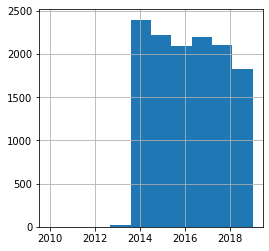

In [39]:
# Check for abnormalities in numbers
df['occurrenceyear'].hist(figsize = (4,4))

In [40]:
df['occurrenceyear'].value_counts()

2014.0    2399
2015.0    2222
2017.0    2204
2018.0    2108
2016.0    2097
2019.0    1823
2013.0      19
2010.0       1
Name: occurrenceyear, dtype: int64

Text(0.5, 1.0, 'Year')

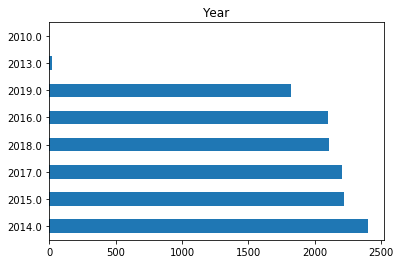

In [41]:
df['occurrenceyear'].value_counts().plot(kind = 'barh')
plt.title('Year')

In [42]:
# Choose to use last 6 years of data
df_outlier = df[df['occurrenceyear'].isin([2014,2015,2016,2017,2018,2019])]

In [43]:
df_outlier['occurrenceyear'].value_counts()

2014.0    2399
2015.0    2222
2017.0    2204
2018.0    2108
2016.0    2097
2019.0    1823
Name: occurrenceyear, dtype: int64

Text(0.5, 1.0, 'Month')

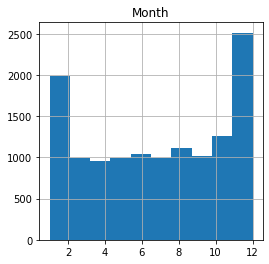

In [44]:
# Checking data
df_outlier['occurrencemonth'].hist(figsize = (4,4))
plt.title('Month')

Text(0.5, 1.0, 'Day')

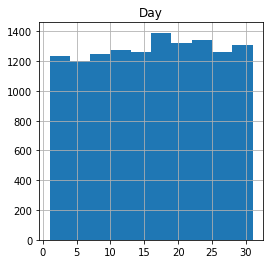

In [45]:
# Checking data
df_outlier['occurrenceday'].hist(figsize = (4,4))
plt.title('Day')

In [58]:
df_outlier['occurrencehour'].value_counts()

12    1037
10     837
13     832
9      817
14     806
8      794
11     771
18     736
19     617
0      600
17     586
15     575
16     556
20     511
21     425
7      399
22     372
23     321
1      275
2      248
3      215
6      190
4      183
5      150
Name: occurrencehour, dtype: int64

Text(0.5, 1.0, 'Hour')

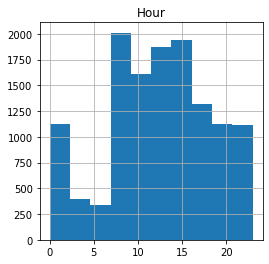

In [46]:
# Checking data
df_outlier['occurrencehour'].hist(figsize = (4,4))
plt.title('Hour')

In [47]:
# Make sure data needed has been converted to numerical data
df_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12853 entries, 16 to 43284
Data columns (total 9 columns):
occurrencedate         12853 non-null object
premisetype            12853 non-null object
occurrenceyear         12853 non-null float64
occurrencemonth        12853 non-null int64
occurrenceday          12853 non-null float64
occurrencedayofyear    12853 non-null float64
occurrencedayofweek    12853 non-null object
occurrencehour         12853 non-null int64
Hood_ID                12853 non-null int64
dtypes: float64(3), int64(3), object(3)
memory usage: 1004.1+ KB


In [48]:
# Check data qualities
df_outlier.describe()

,occurrenceyear,occurrencemonth,occurrenceday,occurrencedayofyear,occurrencehour,Hood_ID
count,12853.000000,12853.000000,12853.000000,12853.000000,12853.000000,12853.000000
mean,2016.378822,6.791722,15.747919,191.271921,12.378200,72.888898
std,1.697119,3.497648,8.648212,106.816966,5.935517,41.594673
min,2014.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,2015.000000,4.000000,8.000000,98.000000,9.000000,39.000000
50%,2016.000000,7.000000,16.000000,197.000000,12.000000,68.000000
75%,2018.000000,10.000000,23.000000,288.000000,17.000000,116.000000
max,2019.000000,12.000000,31.000000,366.000000,23.000000,140.000000


In [49]:
# Make dummy variables
dummy_week_day = pd.get_dummies(df_outlier['occurrencedayofweek'])

In [50]:
dummy_week_day.head(5)

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
16,0,1,0,0,0,0,0
21,0,0,0,0,0,1,0
23,1,0,0,0,0,0,0
25,0,0,0,0,1,0,0
31,0,0,1,0,0,0,0


In [51]:
# Added two tables together
df_concat = pd.concat([df_outlier,dummy_week_day], axis = 1)
df_concat.head(5)

,occurrencedate,premisetype,occurrenceyear,occurrencemonth,occurrenceday,occurrencedayofyear,occurrencedayofweek,occurrencehour,Hood_ID,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
16,2014/01/06 05:00:00+00,House,2014.0,1,6.0,6.0,Monday,22,9,0,1,0,0,0,0,0
21,2014/01/14 05:00:00+00,House,2014.0,1,14.0,14.0,Tuesday,16,119,0,0,0,0,0,1,0
23,2014/01/31 05:00:00+00,House,2014.0,1,31.0,31.0,Friday,7,27,1,0,0,0,0,0,0
25,2014/01/30 05:00:00+00,House,2014.0,1,30.0,30.0,Thursday,19,45,0,0,0,0,1,0,0
31,2014/02/15 05:00:00+00,House,2014.0,2,15.0,46.0,Saturday,21,103,0,0,1,0,0,0,0


In [52]:
df_concat.drop(['occurrencedate','premisetype','Hood_ID'], axis = 1, inplace = True)
df_concat.head(5)

,occurrenceyear,occurrencemonth,occurrenceday,occurrencedayofyear,occurrencedayofweek,occurrencehour,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
16,2014.0,1,6.0,6.0,Monday,22,0,1,0,0,0,0,0
21,2014.0,1,14.0,14.0,Tuesday,16,0,0,0,0,0,1,0
23,2014.0,1,31.0,31.0,Friday,7,1,0,0,0,0,0,0
25,2014.0,1,30.0,30.0,Thursday,19,0,0,0,0,1,0,0
31,2014.0,2,15.0,46.0,Saturday,21,0,0,1,0,0,0,0


In [53]:
# Created column to count break and enter occurrences when next team member uses .groupby
# Will allow to group and count theft occurrences for different dates and times
df_concat['occurr_count'] = 1
df_concat.head(5)

,occurrenceyear,occurrencemonth,occurrenceday,occurrencedayofyear,occurrencedayofweek,occurrencehour,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,occurr_count
16,2014.0,1,6.0,6.0,Monday,22,0,1,0,0,0,0,0,1
21,2014.0,1,14.0,14.0,Tuesday,16,0,0,0,0,0,1,0,1
23,2014.0,1,31.0,31.0,Friday,7,1,0,0,0,0,0,0,1
25,2014.0,1,30.0,30.0,Thursday,19,0,0,0,0,1,0,0,1
31,2014.0,2,15.0,46.0,Saturday,21,0,0,1,0,0,0,0,1


In [54]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12853 entries, 16 to 43284
Data columns (total 14 columns):
occurrenceyear         12853 non-null float64
occurrencemonth        12853 non-null int64
occurrenceday          12853 non-null float64
occurrencedayofyear    12853 non-null float64
occurrencedayofweek    12853 non-null object
occurrencehour         12853 non-null int64
Friday                 12853 non-null uint8
Monday                 12853 non-null uint8
Saturday               12853 non-null uint8
Sunday                 12853 non-null uint8
Thursday               12853 non-null uint8
Tuesday                12853 non-null uint8
Wednesday              12853 non-null uint8
occurr_count           12853 non-null int64
dtypes: float64(3), int64(3), object(1), uint8(7)
memory usage: 891.2+ KB


In [55]:
df_outlier.to_csv('GP_No_DummyList.csv')

In [56]:
df_concat.to_csv('GP_DummyList.csv')